In [17]:
import numpy as np
import pandas as pd
import scipy as sp
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
%matplotlib

loc = 'workstation'
if loc == 'laptop':
    #eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/student_projects/EffortDifficulty/analysis/tools'
    eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/tools'
    wd         = '/Users/sammichekroud/Desktop/postdoc/wmconfidence' #working on confidence data, but in postdoc dir
elif loc == 'workstation':
    eyefuncdir = 'C:/Users/sammirc/Desktop/postdoc/tools/'
    wd         =  'C:/Users/sammirc/Desktop/postdoc/tuningcurves'
os.chdir(wd)
sys.path.insert(0, eyefuncdir)
import eyefuncs as eyes

eyedir = op.join(wd, 'data', 'eyes')
bdir   = op.join(wd, 'data', 'datafiles')

subs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,     11, 12, 13, 14, 15, 16, 17, 18,     20, 21, 22,     24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,             13, 14, 15,     17,         20, 21, 22,     24, 25, 26])
nsubs = subs.size

#set some params here
modeltimes = np.round(np.load(op.join(wd, 'data', 'tuningcurves', 'times.npy')), 2)
eyetimes   = np.round(np.load(op.join(wd, 'data', 'glms', 'glm2', 'eyetracker_times.npy')), 2)
regnames   = np.load(op.join(wd, 'data', 'glms', 'glm2', 'regressor_names_alphaonly.npy'))
regnames2  = np.load(op.join(wd, 'data', 'glms', 'glm2', 'regressor_names_b1only.npy'))
nparams = regnames.size
#ppts x tuning curve timepoints x regressors x
b = np.zeros(shape = [nsubs, modeltimes.size, nparams, eyetimes.size]) * np.nan
t = np.zeros(shape = [nsubs, modeltimes.size, nparams, eyetimes.size]) * np.nan

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [18]:
#save individual betas and tstats
use_b = True #determines if using the beta or t-value for the parameter in the amplitude fit stage
fittype = 'opt' #whether to have used the optimised fit or glm fit at the second stage
if use_b:
    addtext = 'modelB1beta'
else:
    addtext = 'modelB1tvalue'

if fittype == 'opt':
    fittext = 'b1optfit'
elif fittype == 'glm':
    fittext = 'b1glmfit'


In [36]:
a = np.zeros(shape = [nsubs, nparams, modeltimes.size, eyetimes.size]) * np.nan
b = np.zeros_like(a) * np.nan
subcount = -1
for sub in subs:
    subcount += 1
    glm1b = np.load(op.join(wd, 'data', 'glms', 'glm2', f'wmc_s{sub:02d}_glm2_betas_{fittext}_{addtext}_alphaonly.npy'))
    # glm1t = np.load(op.join(wd, 'data', 'glms', 'glm2', f'wmc_s{sub:02d}_glm2_tvalues_{fittext}_{addtext}_alphaonly.npy'))

    glm2b = np.load(op.join(wd, 'data', 'glms', 'glm2', f'wmc_s{sub:02d}_glm2_betas_{fittext}_{addtext}_b1only.npy'))
    # glm2t = np.load(op.join(wd, 'data', 'glms', 'glm2', f'wmc_s{sub:02d}_glm2_tvalues_{fittext}_{addtext}_b1only.npy'))

    a[subcount] = glm1b.copy()
    b[subcount] = glm2b.copy()
am = a.copy().mean(0) #average across participants
bm = b.copy().mean(0) #average across participants

<font color='red'>

two models were run, with the same constant but different regressors (the first model had the modelled tuning curve precision as a regressor, the second had the modelled tuning curve amplitude as a regressor)

we just want to plot the constant regressor (intercept, mean pupil evoked response) from the two models to ensure it isn't hugely different

Text(0.5, 0, 'time relative to array onset (s)')

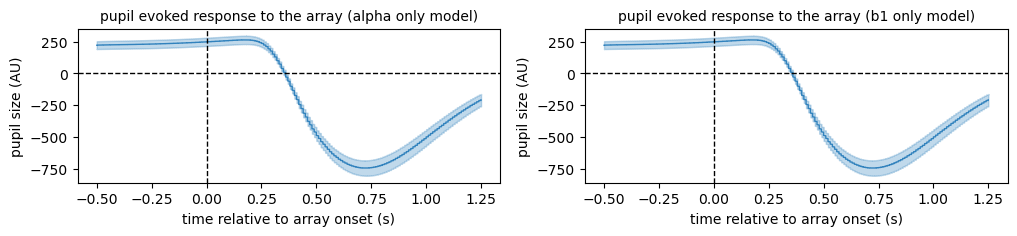

In [35]:
#quickly just visualise what the average pupil-evoked response is to the array
fig = plt.figure(figsize = [12, 2])
ax = fig.add_subplot(121)
plotd = a[:,0].copy() #has shape ppts x modeltimes x eyetimes
plotd = plotd.mean(axis=1).squeeze() #average across model times
plotm = plotd.mean(0) #average across ppts
plotsem = sp.stats.sem(plotd, axis=0, ddof=0, nan_policy='omit')

ax.plot(eyetimes, plotm, lw = 1, color = '#3182bd')
ax.fill_between(eyetimes, np.add(plotm, plotsem), np.subtract(plotm, plotsem), edgecolor=None, color='#3182bd', alpha=0.3)
ax.axhline(0, lw=1, ls='dashed', color='k')
ax.axvline(0, lw =1, ls='dashed', color='k')
ax.set_title('pupil evoked response to the array (alpha only model)', fontsize=10)
ax.set_ylabel('pupil size (AU)')
ax.set_xlabel('time relative to array onset (s)')

ax = fig.add_subplot(122)
plotd = b[:,0].copy() #has shape ppts x modeltimes x eyetimes
plotd = plotd.mean(axis=1).squeeze() #average across model times
plotm = plotd.mean(0) #average across ppts
plotsem = sp.stats.sem(plotd, axis=0, ddof=0, nan_policy='omit')

ax.plot(eyetimes, plotm, lw = 1, color = '#3182bd')
ax.fill_between(eyetimes, np.add(plotm, plotsem), np.subtract(plotm, plotsem), edgecolor=None, color='#3182bd', alpha=0.3)
ax.axhline(0, lw=1, ls='dashed', color='k')
ax.axvline(0, lw =1, ls='dashed', color='k')
ax.set_title('pupil evoked response to the array (b1 only model)', fontsize=10)
ax.set_ylabel('pupil size (AU)')
ax.set_xlabel('time relative to array onset (s)')


In [37]:
am.shape


(2, 175, 1750)

<font color='red'>

now, we want to look specifically at what the regressors for tuning curve precision and tuning curve amplitude look like in their relationship to pupil dilation

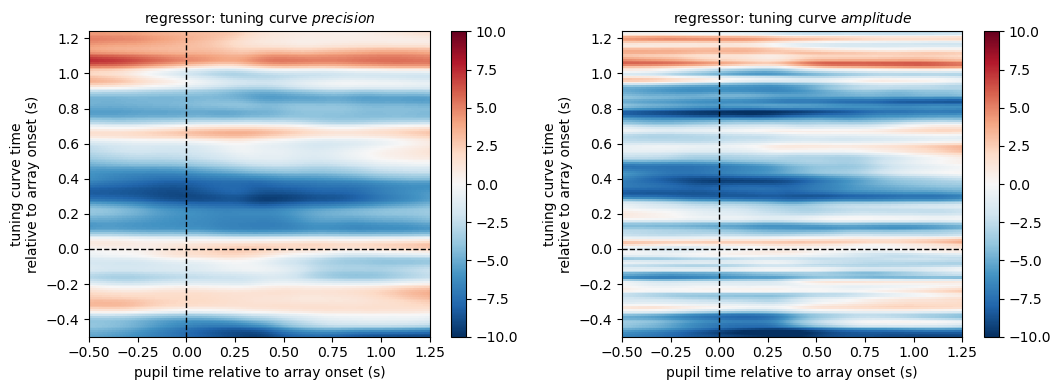

In [51]:
fig = plt.figure(figsize = [16, 4])
labels = ['precision', 'amplitude']
for iplot in range(2):
    if iplot == 0:
        datuse = am.copy()
    elif iplot == 1:
        datuse = bm.copy()
    ax = fig.add_subplot(1, 3, iplot+1)
    plot = ax.imshow(datuse[1].squeeze(), aspect= 'auto', interpolation='none', cmap='RdBu_r', origin = 'lower',
                      vmin = -10, vmax = 10, 
                      extent = [eyetimes.min(), eyetimes.max(), modeltimes.min(), modeltimes.max()])
    ax.set_title(f'regressor: tuning curve ${labels[iplot]}$', fontsize = 10)
    ax.axvline(0, ls = 'dashed', color = 'k', lw = 1)
    ax.axhline(0, ls = 'dashed', color = 'k', lw = 1)
    ax.set_ylabel('tuning curve time\nrelative to array onset (s)', fontsize=10)
    ax.set_xlabel('pupil time relative to array onset (s)', fontsize = 10)
    fig.colorbar(plot)
fig.tight_layout()

<font color='red'> we can also plot this as a timeseries instead, looking at how pupil dilation across the full pupil-evoked response is related to tuning curve amplitude and precision in specific time periods

In [57]:
iplot, istart, iend = 0, -0.3, -0.1
tinds = np.logical_and(modeltimes >= istart, modeltimes <= iend)
plotd = a[:,1,tinds].mean(axis=1) #average across tuning curve time
plotm = 
plotd.shape

(16, 1750)

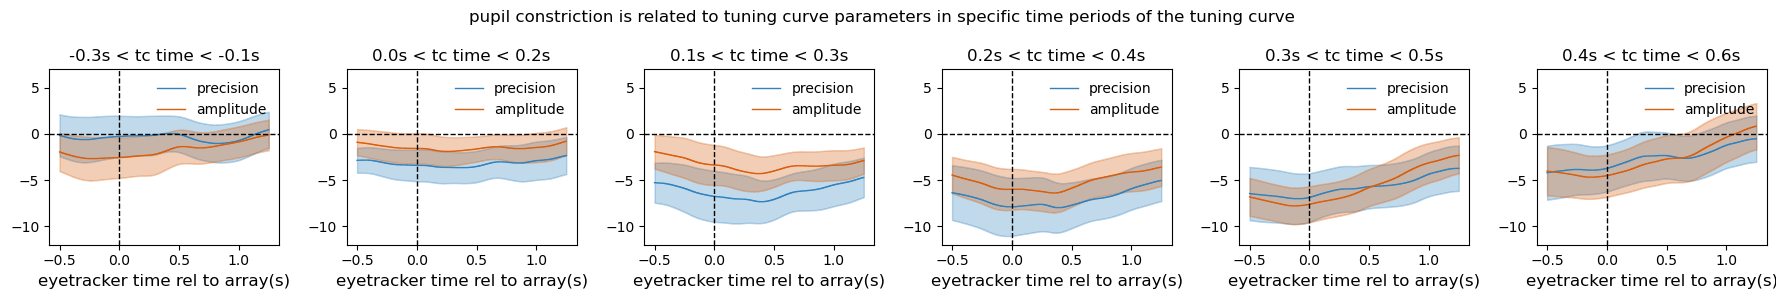

In [65]:
mstarts = [-0.3, 0.0, 0.1, 0.2, 0.3, 0.4]
mends   = [-0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
nplots = len(mstarts)
cols = ['#3182bd', '#d95f0e']
labs = ['precision', 'amplitude']
fig = plt.figure(figsize = [18, 3])
for iplot, istart, iend in zip(range(nplots), mstarts, mends):
    ax = fig.add_subplot(1, nplots, iplot+1)
    # print(iplot, istart, iend)
    tinds = np.logical_and(modeltimes >= istart, modeltimes <= iend)
    for ireg in range(2):
        if ireg == 0:
            plotd = a[:, 1, tinds].mean(axis=1) #average across the timewindow
        elif ireg == 1:
            plotd = b[:, 1, tinds].mean(axis=1)
        plotm = plotd.mean(axis=0) #average across participants
        plotsem = sp.stats.sem(plotd, axis=0, ddof=0, nan_policy='omit')
    
        ax.plot(eyetimes, plotm, label = labs[ireg], lw = 1, c = cols[ireg])
        ax.fill_between(eyetimes,
                        np.add(plotm, plotsem),
                        np.subtract(plotm, plotsem),
                        edgecolor=None, alpha = 0.3, color = cols[ireg])
    ax.axhline(0, lw = 1, ls = 'dashed', color='k')
    ax.axvline(0, lw = 1, ls = 'dashed', color='k')
    ax.set_title(f'{istart}s < tc time < {iend}s', fontsize = 12)
    ax.set_ylim([-12, 7])
    ax.set_xlabel('eyetracker time rel to array(s)', fontsize = 12)
    ax.legend(loc = 'upper right', frameon=False)
fig.suptitle('pupil constriction is related to tuning curve parameters in specific time periods of the tuning curve', fontsize = 12)
fig.tight_layout()

<font color='red'>

so, the alternative way of doing this is to flip axes: rather than saying where are the tuning curve parameters related to pupil dilation, instead we can say, for example: where does baseline pupil size influence the tuning curve parameters over time?


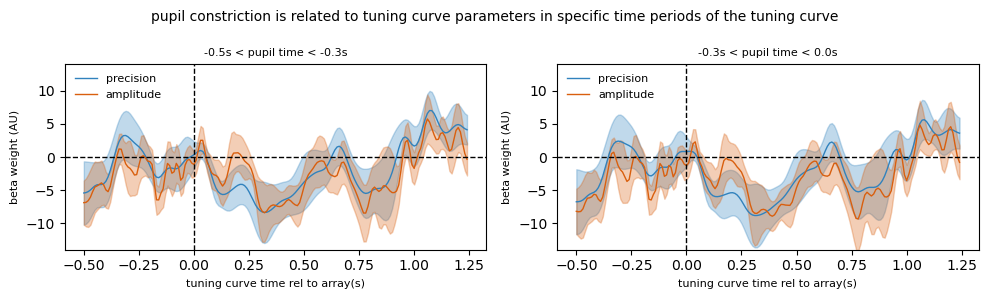

In [97]:
mstarts = [-0.5, -0.3]
mends   = [-0.3,  0.0]
nplots = len(mstarts)
cols = ['#3182bd', '#d95f0e']
labs = ['precision', 'amplitude']
fig = plt.figure(figsize = [10, 3])
for iplot, istart, iend in zip(range(nplots), mstarts, mends):
    ax = fig.add_subplot(1, nplots, iplot+1)
    # print(iplot, istart, iend)
    tinds = np.logical_and(eyetimes >= istart, eyetimes <= iend)
    for ireg in range(2):
        if ireg == 0:
            plotd = a[:, :, :, tinds].mean(axis= -1) #average across the timewindow
        elif ireg == 1:
            plotd = b[:, :, :, tinds].mean(axis= -1)
        plotd = plotd[:,1] #take just the relevant parameter
        plotm = plotd.mean(axis=0) #average across participants
        plotsem = sp.stats.sem(plotd, axis=0, ddof=0, nan_policy='omit')
    
        ax.plot(modeltimes, plotm, label = labs[ireg], lw = 1, c = cols[ireg])
        ax.fill_between(modeltimes,
                        np.add(plotm, plotsem),
                        np.subtract(plotm, plotsem),
                        edgecolor=None, alpha = 0.3, color = cols[ireg])
    ax.axhline(0, lw = 1, ls = 'dashed', color='k')
    ax.axvline(0, lw = 1, ls = 'dashed', color='k')
    ax.set_title(f'{istart}s < pupil time < {iend}s', fontsize = 8)
    ax.set_ylim([-14, 14])
    ax.set_xlabel('tuning curve time rel to array(s)', fontsize = 8)
    ax.set_ylabel('beta weight (AU)', fontsize = 8)
    ax.legend(loc = 'upper left', frameon=False, fontsize=8)
fig.suptitle('pupil constriction is related to tuning curve parameters in specific time periods of the tuning curve', fontsize = 10)
fig.tight_layout()